# 라이브러리 로드

In [46]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.datasets import get_rdataset

# ch3. 데이터 탐색하기

## 3.1. 시계열 데이터 주요 형태

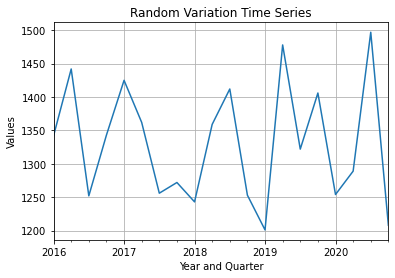

In [28]:
'''
    - 우연변동 시계열
    ex. 주기를 타지 않는 제품의 생산량, 판매량 데이터, 짧은 기간의 주가 데이터, 금리 등
'''
data = np.array([1342, 1442, 1252, 1343,
                 1425, 1362, 1256, 1272,
                 1243, 1359, 1412, 1253,
                 1201, 1478, 1322, 1406,
                 1254, 1289, 1497, 1208]).reshape(5, 4)

# pandas DataFrame으로 변환
df = pd.DataFrame(data, columns=['Q1', 'Q2', 'Q3', 'Q4'])

# 시작년도와 분기를 설정
start_year = 2016
years = [start_year + i for i in range(df.shape[0])]
quarters = ['Q1', 'Q2', 'Q3', 'Q4']

# 날짜 인덱스 생성
date_index = pd.PeriodIndex([f"{year}Q{q}" for year in years for q in range(1, 5)], freq='Q')

# 시계열 데이터로 변환
ts = pd.Series(data.flatten(), index=date_index)

ts.plot(title='Random Variation Time Series')

plt.xlabel('Year and Quarter')
plt.ylabel('Values')

plt.grid(True)

plt.show()

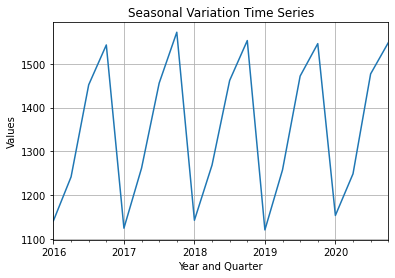

In [29]:
'''
    - 계절변동 시계열
    ex. 강수량, 적설량, 아이스크림 판매 추이, 전력 소비량, 성숙한 플랫폼의 데일리 트래픽 등
'''
data = np.array([1142, 1242, 1452, 1543,
                1125, 1262, 1456, 1572,
                1143, 1269, 1462, 1553,
                1121, 1258, 1472, 1546,
                1154, 1249, 1477, 1548]).reshape(5, 4)

# 시작년도와 분기를 설정
start_year = 2016
years = [start_year + i for i in range(df.shape[0])]
quarters = ['Q1', 'Q2', 'Q3', 'Q4']

# 날짜 인덱스 생성
date_index = pd.PeriodIndex([f"{year}Q{q}" for year in years for q in range(1, 5)], freq='Q')

# 시계열 데이터로 변환
ts = pd.Series(data.flatten(), index=date_index)

ts.plot(title='Seasonal Variation Time Series')

plt.xlabel('Year and Quarter')
plt.ylabel('Values')

plt.grid(True)

plt.show()

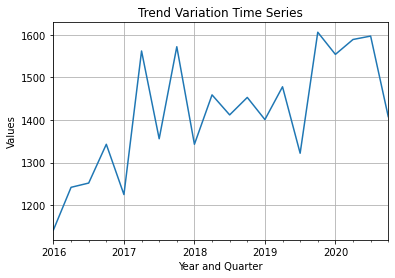

In [30]:
'''
    - 추세변동 시계열
    - 보통 시계열의 최저점을 많이 봄
    - 전체적으로 우상향했는지, 하향했는지 봄
    ex. 물가 데이터, 희소 원자재 가격 데이터, 대부분의 주가지수 데이터
'''
data = np.array([1142, 1242, 1252, 1343,
                1225, 1562, 1356, 1572,
                1343, 1459, 1412, 1453,
                1401, 1478, 1322, 1606,
                1554, 1589, 1597, 1408]).reshape(5, 4)

# 시작년도와 분기를 설정
start_year = 2016
years = [start_year + i for i in range(df.shape[0])]
quarters = ['Q1', 'Q2', 'Q3', 'Q4']

# 날짜 인덱스 생성
date_index = pd.PeriodIndex([f"{year}Q{q}" for year in years for q in range(1, 5)], freq='Q')

# 시계열 데이터로 변환
ts = pd.Series(data.flatten(), index=date_index)

ts.plot(title='Trend Variation Time Series')

plt.xlabel('Year and Quarter')
plt.ylabel('Values')

plt.grid(True)

plt.show()

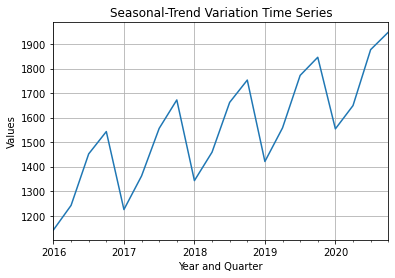

In [31]:
'''
    - 계절적 추세변동 시계열
'''
data = np.array([1142, 1242, 1452, 1543,
                1225, 1362, 1556, 1672,
                1343, 1459, 1662, 1753,
                1421, 1558, 1772, 1846,
                1554, 1649, 1877, 1948]).reshape(5, 4)

# 시작년도와 분기를 설정
start_year = 2016
years = [start_year + i for i in range(df.shape[0])]
quarters = ['Q1', 'Q2', 'Q3', 'Q4']

# 날짜 인덱스 생성
date_index = pd.PeriodIndex([f"{year}Q{q}" for year in years for q in range(1, 5)], freq='Q')

# 시계열 데이터로 변환
ts = pd.Series(data.flatten(), index=date_index)

ts.plot(title='Seasonal-Trend Variation Time Series')

plt.xlabel('Year and Quarter')
plt.ylabel('Values')

plt.grid(True)

plt.show()

## 3.2. 시계열 데이터 시각화

In [42]:
def plot_quarterly_graph(data):

    # pandas DataFrame으로 변환
    df = pd.DataFrame(data, columns=['Q1', 'Q2', 'Q3', 'Q4'])

    # 분기별 평균 계산
    quarterly_averages = df.mean()

    # 그래프 그리기
    fig, axs = plt.subplots(1, 4, figsize=(10, 8), sharex=True)

    for i, quarter in enumerate(['Q1', 'Q2', 'Q3', 'Q4']):
        axs[i].plot(df.index, df[quarter], marker='o', linestyle='-')
        axs[i].hlines(quarterly_averages[quarter], xmin=0, xmax=4, color='red', linestyle='--')
        axs[i].set_title(quarter)
        axs[i].grid(True)

    fig.suptitle('EDA: Variation Series')
    fig.text(0.5, 0.04, 'Quarter: 2016-2020', ha='center')
    fig.text(0.04, 0.5, 'Sales', va='center', rotation='vertical')

    plt.tight_layout(rect=[0.05, 0.05, 1, 0.95])

    plt.show()

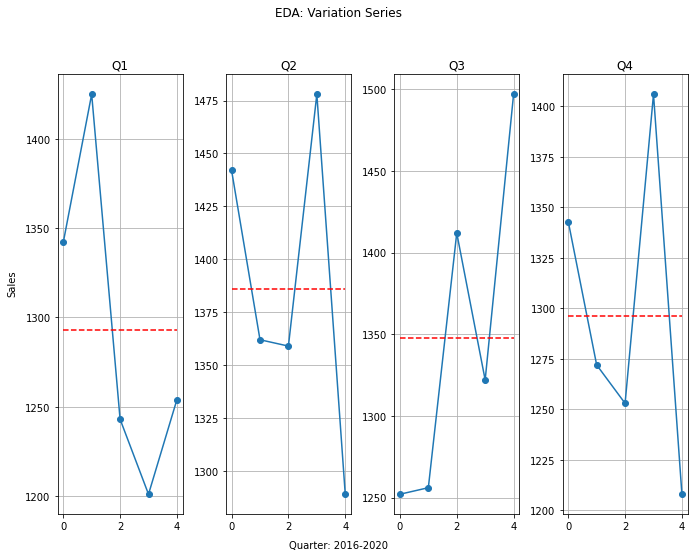

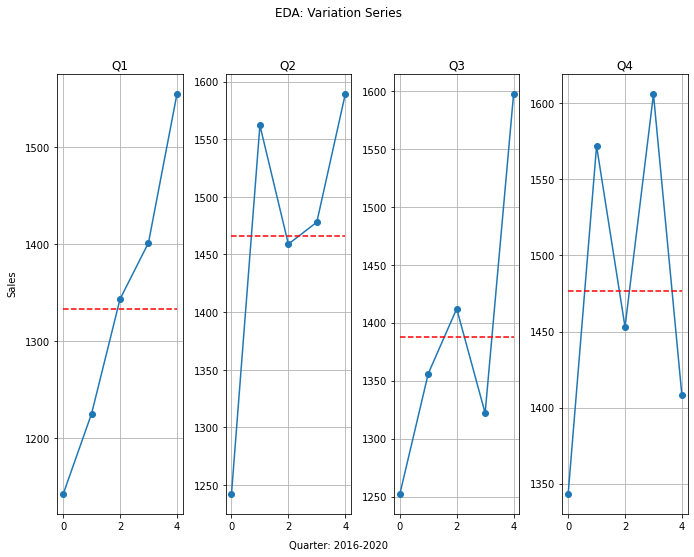

In [50]:
# 데이터 생성
random_data = np.array([1342, 1442, 1252, 1343,
                        1425, 1362, 1256, 1272,
                        1243, 1359, 1412, 1253,
                        1201, 1478, 1322, 1406,
                        1254, 1289, 1497, 1208]).reshape(5, 4)

trend_data = np.array([1142, 1242, 1252, 1343,
                       1225, 1562, 1356, 1572,
                       1343, 1459, 1412, 1453,
                       1401, 1478, 1322, 1606,
                       1554, 1589, 1597, 1408]).reshape(5, 4)

for data in [random_data, trend_data]:
    plot_quarterly_graph(data)

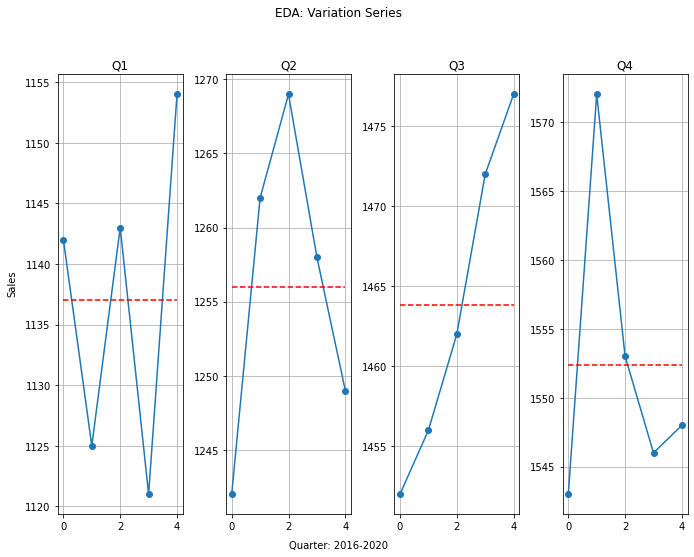

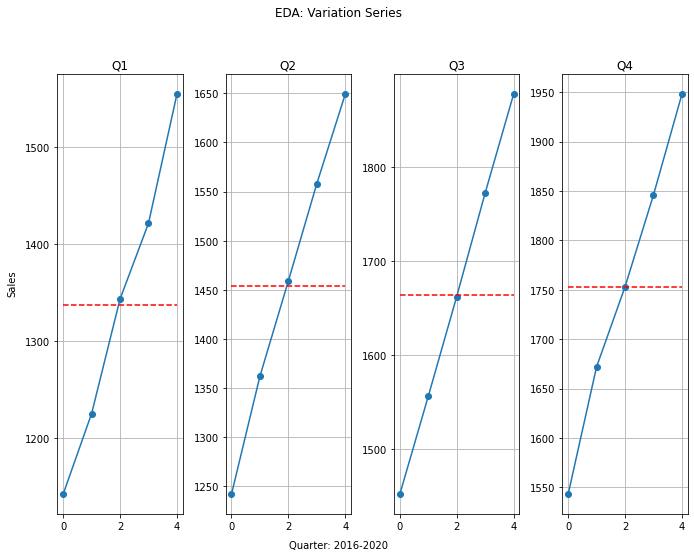

In [44]:
'''
    - seasonal의 경우, 분기별로 각각 봤을 때, 값의 변동폭이 크지 않음
    - 모델링 시, 아래 형태의 시계열은 전처리가 필요함
'''
seasonal_data = np.array([1142, 1242, 1452, 1543,
                1125, 1262, 1456, 1572,
                1143, 1269, 1462, 1553,
                1121, 1258, 1472, 1546,
                1154, 1249, 1477, 1548]).reshape(5, 4)

seasonal_trend_data = np.array([1142, 1242, 1452, 1543,
                1225, 1362, 1556, 1672,
                1343, 1459, 1662, 1753,
                1421, 1558, 1772, 1846,
                1554, 1649, 1877, 1948]).reshape(5, 4)

for data in [seasonal_data, seasonal_trend_data]:
    plot_quarterly_graph(data)

# ch4. 시계열 데이터와 친해지기

* 차분
    *  시차(lag) -> 특정한 활동이 영향을 주었다 (yt-1) -> (yt): 1만큼의 시간이 걸림 (lag=1)
    *  원유 생산량 감축에 대한 뉴스 (6/1) -> 원유 관련 주가 가격 상승 (6/2): lag 1일

* 역차분
    * 모델링 시, 입력값에는 차분한 시계열 데이터 들어감
    * 모델 출력 값 결과 해석 시, 역차분하여 다시 복원

* 시계열 합집합
    * 동일한 시기에 서로 다른 두 상품의 시계열 데이터를 펼쳐서 같이 보고 싶을 때 사용됨

* 시계열 통합
    * aggregate는 summary statistic (요약통계량)을 뜻함
        * 평균 (1st moment)
        * 분산
        * 중간값 (median), 최빈값 (mode), 최솟값 (min), 최댓값 (max)

In [68]:
data = np.array([1342, 1442, 1252, 1343,
                 1425, 1362, 1256, 1272,
                 1243, 1359, 1412, 1253,
                 1201, 1478, 1322, 1406,
                 1254, 1289, 1497, 1208]).reshape(5, 4)

# pandas DataFrame으로 변환
df = pd.DataFrame(data, columns=['Q1', 'Q2', 'Q3', 'Q4'], index=[2016, 2017, 2018, 2019, 2020])

# 시작년도와 분기를 설정
start_year = 2016
years = [start_year + i for i in range(df.shape[0])]
quarters = ['Q1', 'Q2', 'Q3', 'Q4']

# 날짜 인덱스 생성
date_index = pd.PeriodIndex([f"{year}Q{q}" for year in years for q in range(1, 5)], freq='Q')

# 시계열 데이터로 변환
sample_df = pd.DataFrame(data.flatten(), index=date_index, columns=['Value'])

sample_df

,Value
2016Q1,1342
2016Q2,1442
2016Q3,1252
2016Q4,1343
2017Q1,1425
2017Q2,1362
2017Q3,1256
2017Q4,1272
2018Q1,1243
2018Q2,1359


In [70]:
# 1차 차분
# 해당 차분 값을 이용하여 모델링 가능
sample_df.diff()

,Value
2016Q1,NaN
2016Q2,100.0
2016Q3,-190.0
2016Q4,91.0
2017Q1,82.0
2017Q2,-63.0
2017Q3,-106.0
2017Q4,16.0
2018Q1,-29.0
2018Q2,116.0


In [71]:
# 2차 차분
sample_df.diff(2)

,Value
2016Q1,NaN
2016Q2,NaN
2016Q3,-90.0
2016Q4,-99.0
2017Q1,173.0
2017Q2,19.0
2017Q3,-169.0
2017Q4,-90.0
2018Q1,-13.0
2018Q2,87.0


In [88]:
# 역차분
# 모델링 이후 결과 값을 다시 원래의 값으로 복원하기 위해 사용
initial_value = sample_df['Value']
sample_df_diff = sample_df.diff()

# 시계열 초기 값 + 1차 차분한 결과 누적합
sample_df['DiffInv_Value'] = sample_df['Value'].iloc[0] + sample_df_diff['Value'].cumsum()
sample_df.iloc[0, 1] = sample_df['Value'].iloc[0]

sample_df

,Value,DiffInv_Value
2016Q1,1342.0,1342.0
2016Q2,1442.0,1442.0
2016Q3,1252.0,1252.0
2016Q4,1343.0,1343.0
2017Q1,1425.0,1425.0
2017Q2,1362.0,1362.0
2017Q3,1256.0,1256.0
2017Q4,1272.0,1272.0
2018Q1,1243.0,1243.0
2018Q2,1359.0,1359.0


In [108]:
# 시계열 합집합
# prod1 생성
data1 = np.arange(1, 25).reshape(8, 3, order='F')  # 1부터 24까지의 숫자를 8x3 행렬로 변환
index1 = pd.date_range(start='2019-01-01', periods=8, freq='Q').to_period('Q').strftime('%Y Q%q') # 2019년 1분기부터 시작하는 분기별 날짜 인덱스 생성
prod1 = pd.DataFrame(data1, index=index1, columns=['web', 'app', 'hyb'])  # DataFrame 생성

# prod2 생성
data2 = np.arange(11, 23).reshape(4, 3, order='F')  # 11부터 22까지의 숫자를 4x3 행렬로 변환
index2 = pd.date_range(start='2020-01-01', periods=4, freq='Q').to_period('Q').strftime('%Y Q%q')  # 2020년 1분기부터 시작하는 분기별 날짜 인덱스 생성
prod2 = pd.DataFrame(data2, index=index2, columns=['web', 'app', 'hyb'])  # DataFrame 생성

# 결과 출력
print("prod1:")
print(prod1)
print("\nprod2:")
print(prod2)

union_df = pd.merge(prod1, prod2, left_index=True, right_index=True, how='outer', suffixes=('_prod1', '_prod2'))
union_df

prod1:
         web  app  hyb
2019 Q1    1    9   17
2019 Q2    2   10   18
2019 Q3    3   11   19
2019 Q4    4   12   20
2020 Q1    5   13   21
2020 Q2    6   14   22
2020 Q3    7   15   23
2020 Q4    8   16   24

prod2:
         web  app  hyb
2020 Q1   11   15   19
2020 Q2   12   16   20
2020 Q3   13   17   21
2020 Q4   14   18   22


,web_prod1,app_prod1,hyb_prod1,web_prod2,app_prod2,hyb_prod2
2019 Q1,1,9,17,NaN,NaN,NaN
2019 Q2,2,10,18,NaN,NaN,NaN
2019 Q3,3,11,19,NaN,NaN,NaN
2019 Q4,4,12,20,NaN,NaN,NaN
2020 Q1,5,13,21,11.0,15.0,19.0
2020 Q2,6,14,22,12.0,16.0,20.0
2020 Q3,7,15,23,13.0,17.0,21.0
2020 Q4,8,16,24,14.0,18.0,22.0


In [107]:
# 시계열 교집합
intersection_df = pd.merge(prod1, prod2, left_index=True, right_index=True, how='inner', suffixes=('_prod1', '_prod2'))
intersection_df

,web_prod1,app_prod1,hyb_prod1,web_prod2,app_prod2,hyb_prod2
2020 Q1,5,13,21,11,15,19
2020 Q2,6,14,22,12,16,20
2020 Q3,7,15,23,13,17,21
2020 Q4,8,16,24,14,18,22


In [109]:
# 시계열 부분추출 및 수정
# 필요한 기간 데이터만 추출
prod1.loc[['2019 Q3', '2020 Q3'], :]

,web,app,hyb
2019 Q3,3,11,19
2020 Q3,7,15,23


In [118]:
# 시계열 통합
# 기간 별 groupby 집계라고 생각하면 됨
prod1_reset = prod1.reset_index()
prod1_reset['year'] = prod1_reset['index'].map(lambda x: x[:4])

prod1_reset.groupby('year').mean()

,web,app,hyb
year,,,
2019,2.5,10.5,18.5
2020,6.5,14.5,22.5
